## CSCN8030 - Artificial Intelligence for Business Decisions and Transformation
### Sprint 4 - Loblaws Digital

Group 6:

Rohit Totlani - 8914803

Pradeepti Kasam - 8965985

Mohammed Benkhial -8928209

### Dataset

[kaggle Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [219]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Loblaws/loblaws.xlsx',sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [220]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  5630
Number of columns:  20


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Data Cleaning

1. Finding & handling missing Values



In [222]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [223]:
#Handling missing values
cols = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
for col in cols:
  df[col] = df[col].fillna(0)

2.Check & Handle Outliers

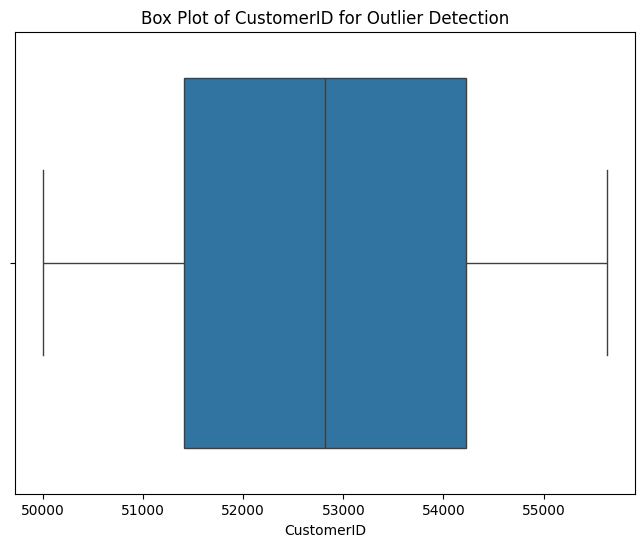

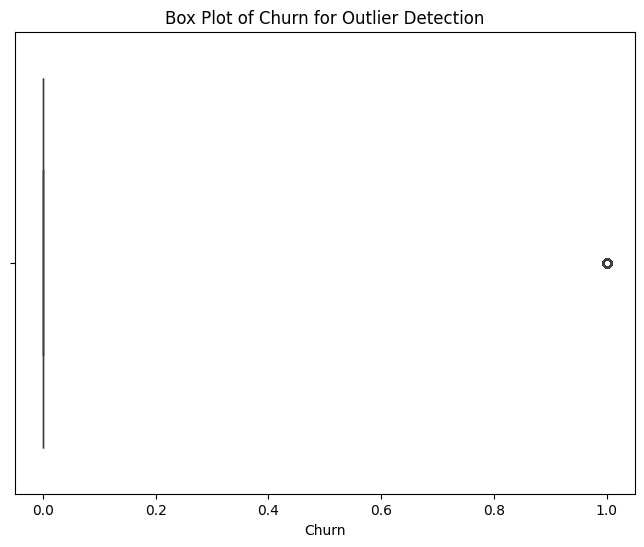

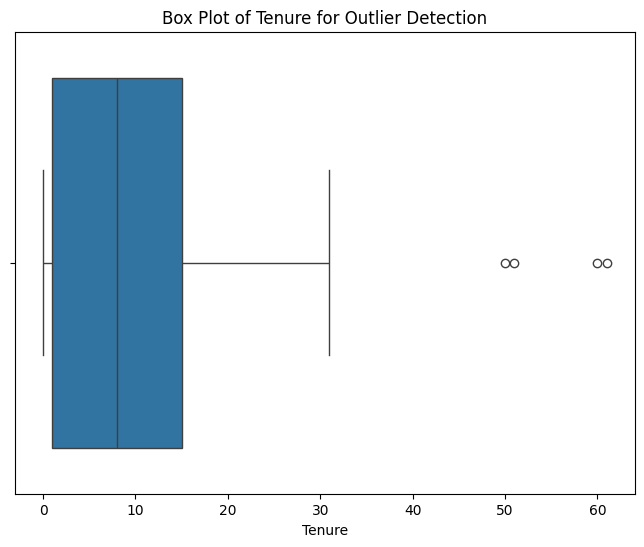

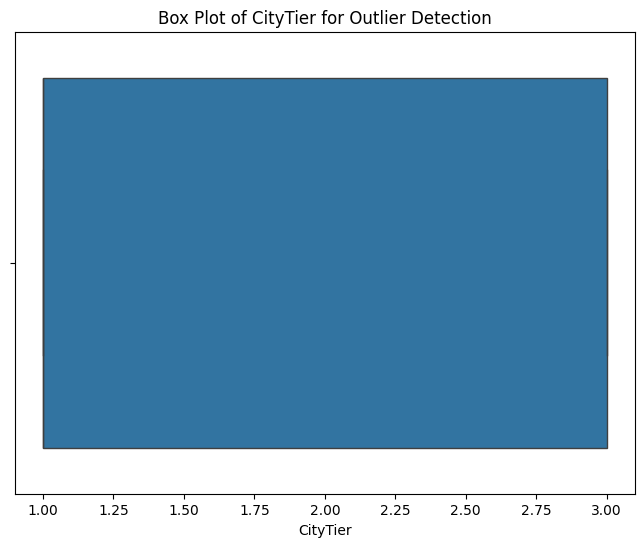

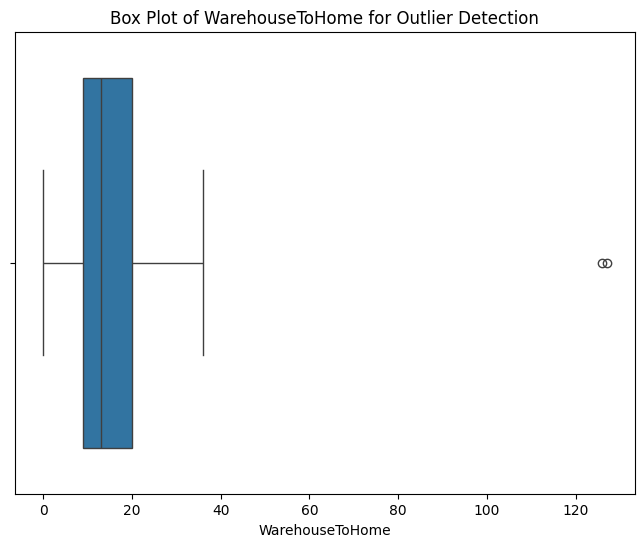

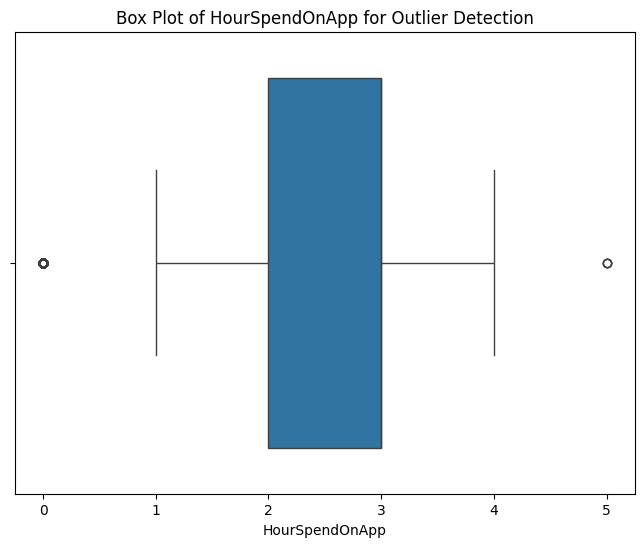

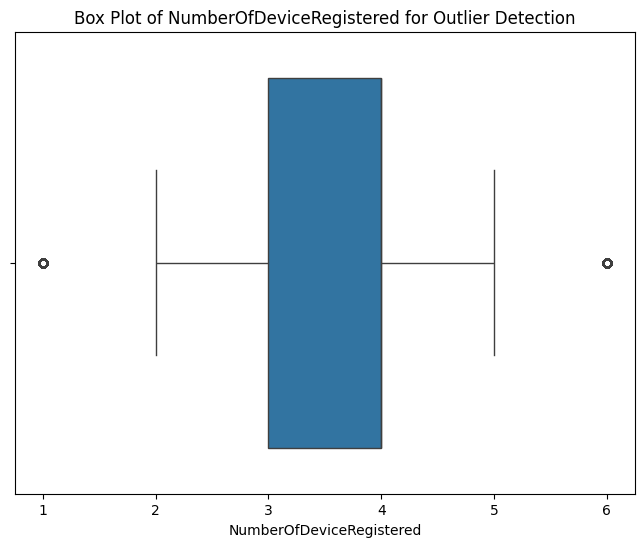

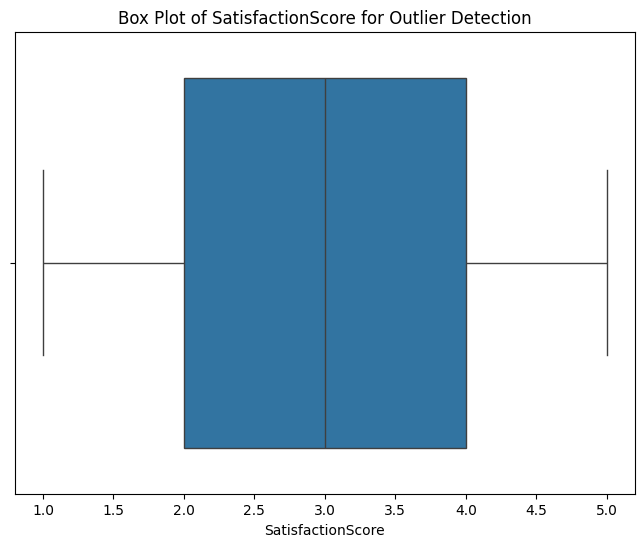

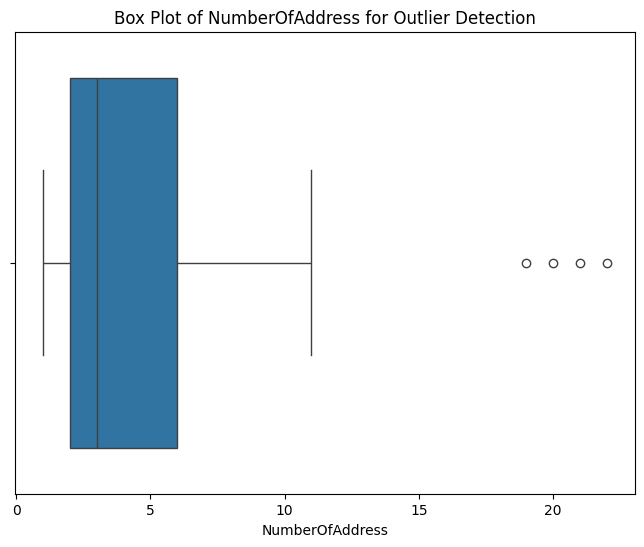

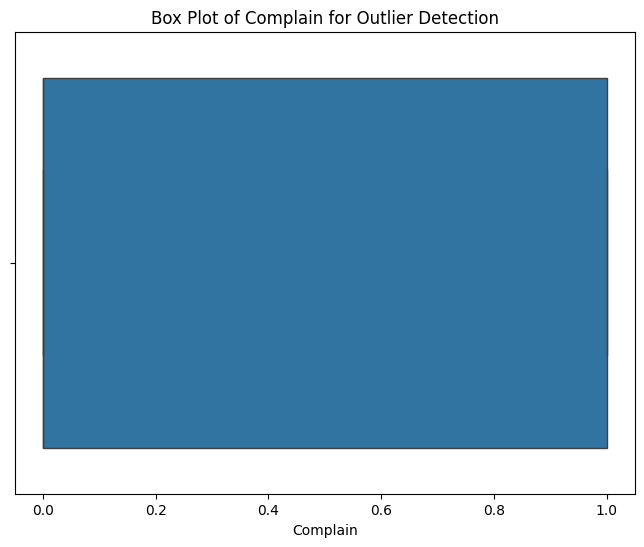

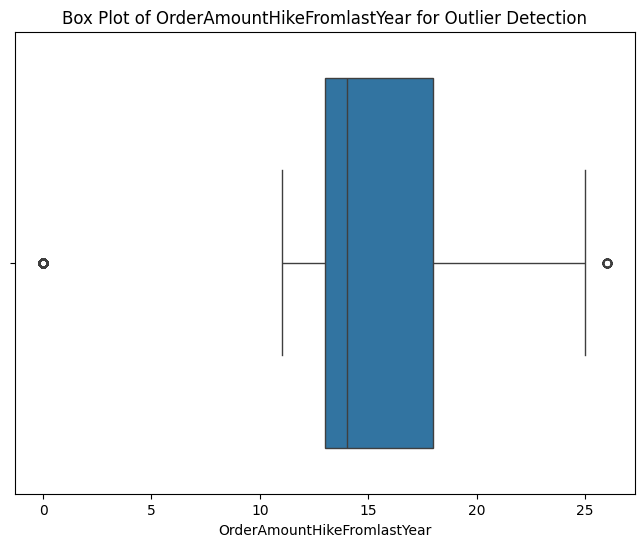

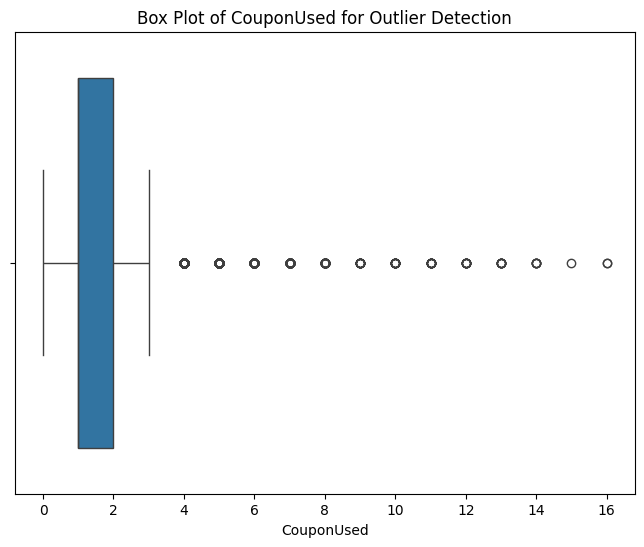

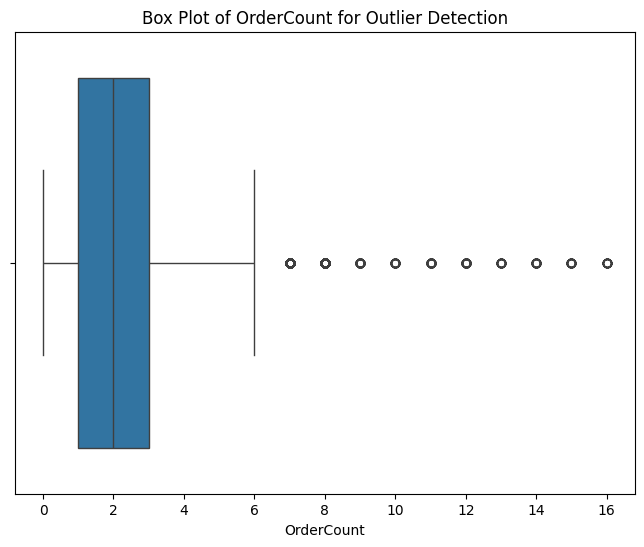

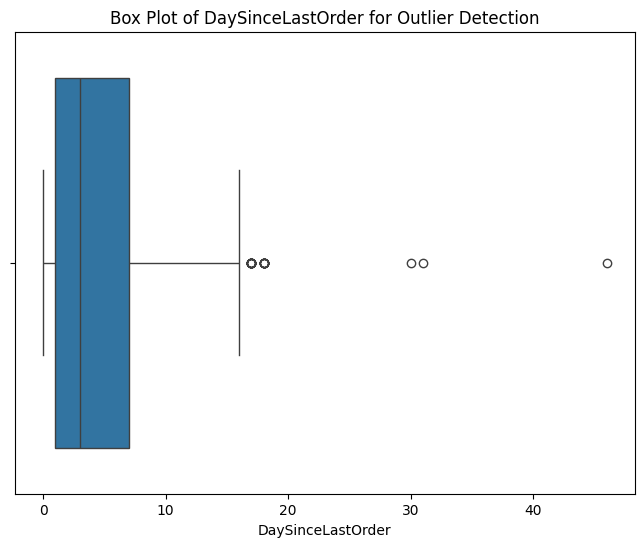

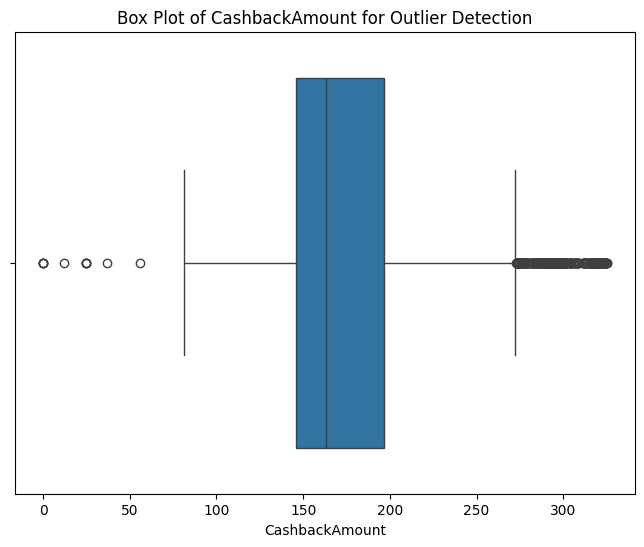

In [224]:
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} for Outlier Detection')
    plt.show()


In [226]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

columns_to_handle = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                     'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for col in columns_to_handle:
    df = handle_outliers(df, col)

3. Identifying and eliminating duplicate rows

In [227]:
print("Number of duplicate rows before removing:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after removing:", df.duplicated().sum())

Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


4. Fixing inconsistent data

In [228]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
for i in cat_cols:
    df[i] = df[i].apply(lambda x: x.lower().replace(" ", "_"))

In [229]:
for i in cat_cols:
  print(df[i].unique())

['mobile_phone' 'phone' 'computer']
['debit_card' 'upi' 'cc' 'cash_on_delivery' 'e_wallet' 'cod' 'credit_card']
['female' 'male']
['laptop_&_accessory' 'mobile' 'mobile_phone' 'others' 'fashion' 'grocery']
['single' 'divorced' 'married']


In [230]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit_Card', 'COD': 'Cash_on_Delivery'})
df['PreferredLoginDevice'] = df["PreferredLoginDevice"].replace("phone", "mobile_phone")
df["PreferedOrderCat"] = df["PreferedOrderCat"].replace("mobile_phone", "mobile")

In [231]:
# Checking if all values are replaced
for i in cat_cols:
    print(f"{i} ---> {df[i].unique()}")
    print()

PreferredLoginDevice ---> ['mobile_phone' 'computer']

PreferredPaymentMode ---> ['debit_card' 'upi' 'cc' 'cash_on_delivery' 'e_wallet' 'cod' 'credit_card']

Gender ---> ['female' 'male']

PreferedOrderCat ---> ['laptop_&_accessory' 'mobile' 'others' 'fashion' 'grocery']

MaritalStatus ---> ['single' 'divorced' 'married']



### EDA

**Percentage of Customers who Left**

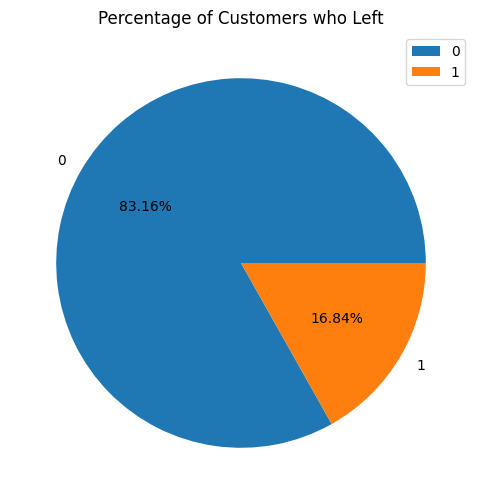

In [232]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [15,6])

percent_count = df['Churn'].value_counts(normalize = True)
ax.pie(x = df['Churn'].value_counts(),labels = percent_count.index, autopct = lambda percent_count: '{:.2f}%'.format(percent_count))
ax.set_title('Percentage of Customers who Left', fontsize = 12)
ax.legend()

plt.show()

The pie chart reveals that a significant majority (83.16%) of customers are satisfied with the company, while a relatively small portion (16.84%) are dissatisfied with the services.

**Customer churn based on Tenure**

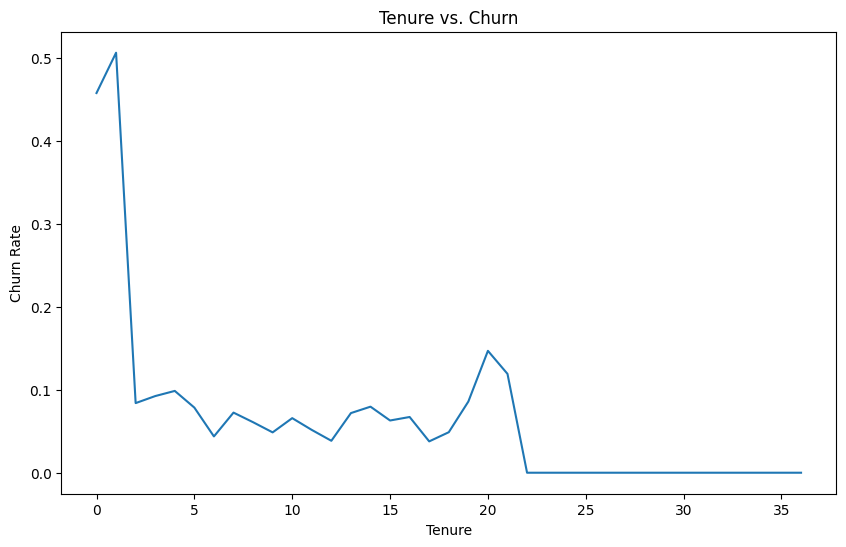

In [233]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='Churn', data=df, errorbar=None)
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()


The churn rate is highest during the first 0–5 years of tenure and significantly declines as customers remain with the company longer.









**Tenure Vs CashbackAmount**

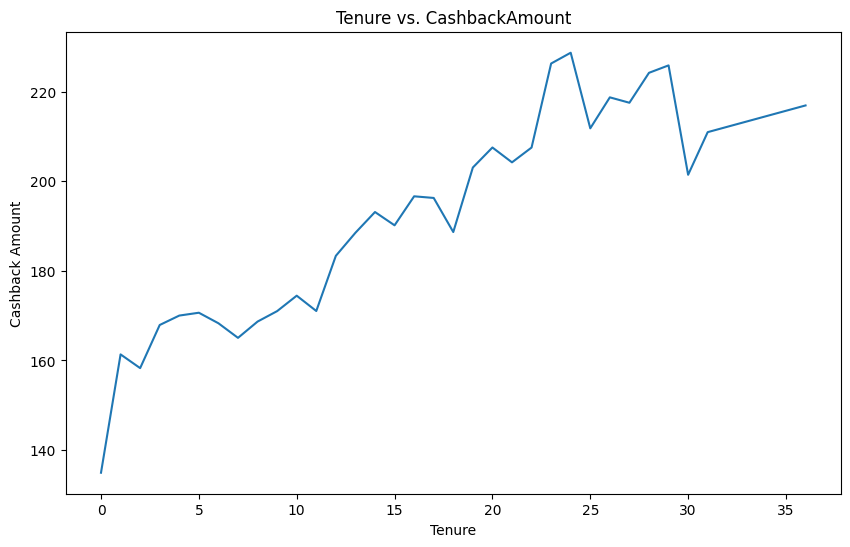

In [234]:
# prompt: generate relation between Tenure Vs CashbackAmount line plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='CashbackAmount', data=df, errorbar=None)
plt.title('Tenure vs. CashbackAmount')
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')
plt.show()


Loyal customers who have been with the company for a longer duration receive higher cashback rewards.

**Churn Rate by Gender and Marital Status**

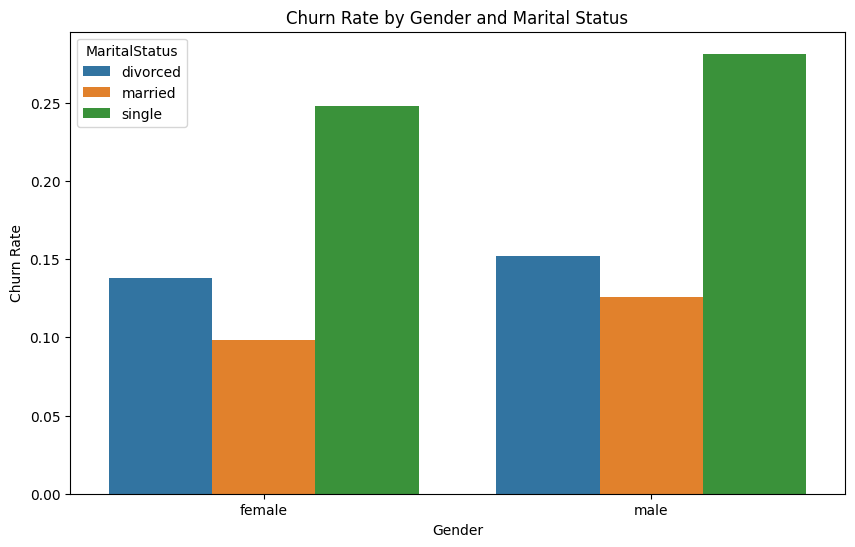

In [ ]:
# Comparison of Gender, Marital Status, and Churn Rate
churn_by_gender_marital = df.groupby(['Gender', 'MaritalStatus'])['Churn'].mean().reset_index()
churn_by_gender_marital = churn_by_gender_marital.rename(columns={'Churn': 'Churn_Rate'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Churn_Rate', hue='MaritalStatus', data=churn_by_gender_marital)
plt.title('Churn Rate by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()
 wi

- This indicates that marital status, specifically being single, is a significant factor in customer churn, and it affects both male and female customers equally.

- It suggests that single customers may be more likely to leave the company compared to other demographic groups.

**Churn Rate by CityTier and Prefered Order Category**

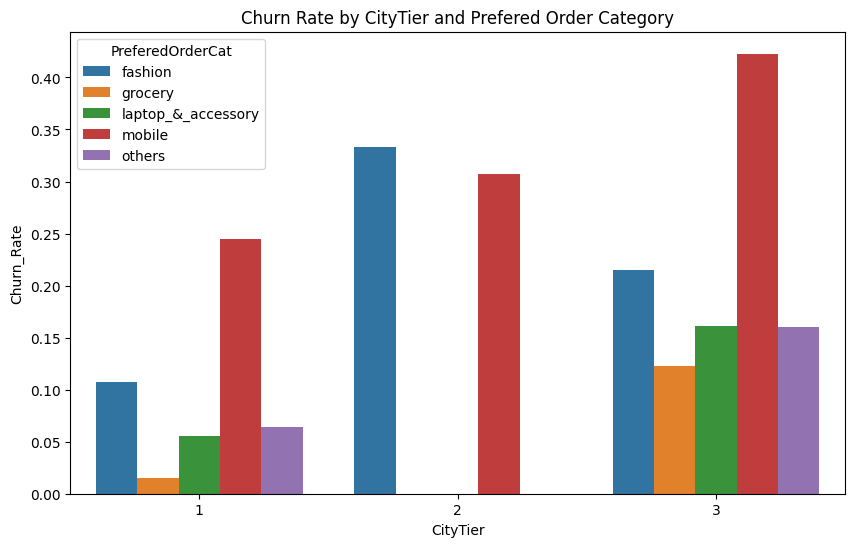

In [236]:
# Comparison of PreferedOrderCat, CityTier, and Churn Rate
churn_by_cat_city = df.groupby(['PreferedOrderCat', 'CityTier'])['Churn'].mean().reset_index()
churn_by_cat_city = churn_by_cat_city.rename(columns={'Churn': 'Churn_Rate'})

plt.figure(figsize=(10, 6))
sns.barplot(x='CityTier', y='Churn_Rate', hue='PreferedOrderCat', data=churn_by_cat_city)
plt.title('Churn Rate by CityTier and Prefered Order Category')
plt.xlabel('CityTier')
plt.ylabel('Churn_Rate')
plt.show()

- This indicates that customers in the mobile category have a higher likelihood of churning, regardless of whether they are from a Tier 1, Tier 2, or Tier 3 city.

- It suggests that factors specific to the mobile category, such as pricing, competition, product quality, or service experience, may be driving customer attrition rather than geographical location.

**WarehouseToHome vs CityTier**

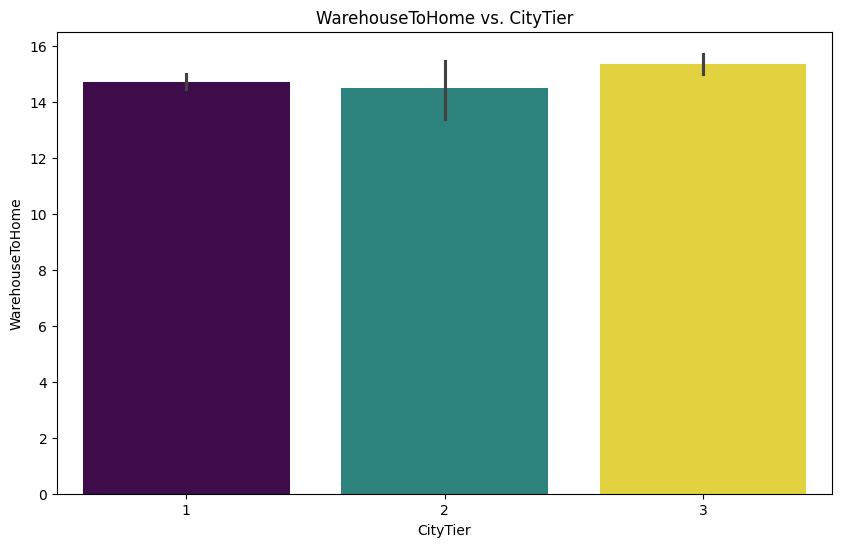

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CityTier', y='WarehouseToHome', data=df, palette='viridis', legend=False, hue='CityTier')
plt.title('WarehouseToHome vs. CityTier')
plt.xlabel('CityTier')
plt.ylabel('WarehouseToHome')
plt.show()

- This indicates that deliveries to Tier 3 cities take longer due to increased Warehouse-to-Home time.

- Possible reasons could include longer transportation distances, fewer distribution centers, logistical challenges, or limited infrastructure compared to Tier 1 and Tier 2 cities.

- This delay could impact customer satisfaction and influence purchase behavior.

**Correlation Matrix**

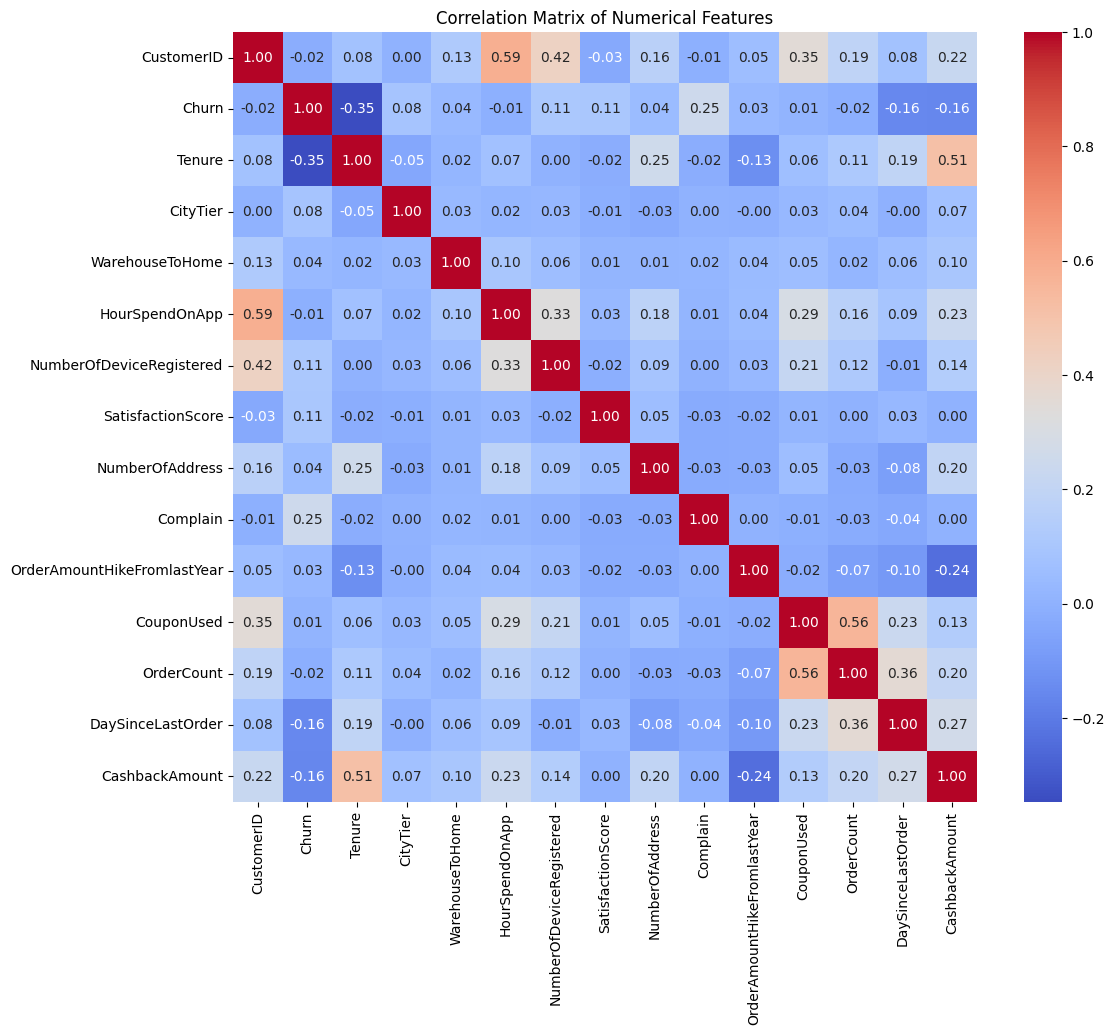

In [238]:
# Correlation Matrix for Numerical Features
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- Tenure and CashbackAmount, as well as CouponUsed and OrderCount, exhibit a strong positive correlation.

- This suggests that customers who have been with the company for a longer duration tend to receive more cashback points.

- Additionally, a higher number of coupons used is associated with an increase in the number of orders placed.

### Data Preprocessing

One-hot encoding

In [239]:
# Perform one-hot encoding on specified columns
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode','Gender', 'PreferedOrderCat', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_cols)
# Print the first few rows of the encoded DataFrame to verify
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_female,Gender_male,PreferedOrderCat_fashion,PreferedOrderCat_grocery,PreferedOrderCat_laptop_&_accessory,PreferedOrderCat_mobile,PreferedOrderCat_others,MaritalStatus_divorced,MaritalStatus_married,MaritalStatus_single
0,50001,1,4.0,3,6.0,3.0,3.0,2,9.0,1,...,True,False,False,False,True,False,False,False,False,True
1,50002,1,0.0,1,8.0,3.0,4.0,3,7.0,1,...,False,True,False,False,False,True,False,False,False,True
2,50003,1,0.0,1,30.0,2.0,4.0,3,6.0,1,...,False,True,False,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4.0,5,8.0,0,...,False,True,False,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,0.5,3.0,5,3.0,0,...,False,True,False,False,False,True,False,False,False,True


### AI Model

**Linear Regression**

In [240]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse: .2f}")
print(f"R-squared: {r2: .2f}")

Mean Squared Error:  0.10
R-squared:  0.30


**Random Forest**

Random Forest Accuracy: 96.54%


Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.99      0.79      0.88       185

    accuracy                           0.97      1126
   macro avg       0.98      0.90      0.93      1126
weighted avg       0.97      0.97      0.96      1126





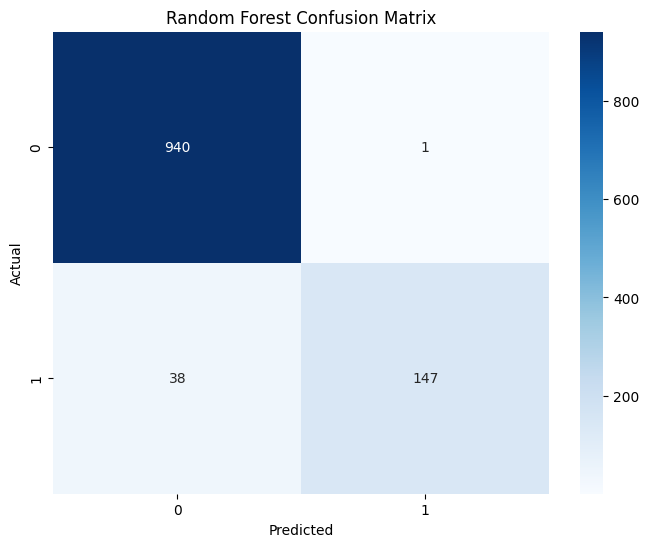

In [241]:
# Define features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy*100))
print("\n")
print("Classification Report")
print(classification_report(y_test, rf_predictions))
print("\n")
#Plot the confusion matrix for Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBoost**

XGBoost Accuracy:97.60%


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.98      0.88      0.92       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.95      1126
weighted avg       0.98      0.98      0.98      1126





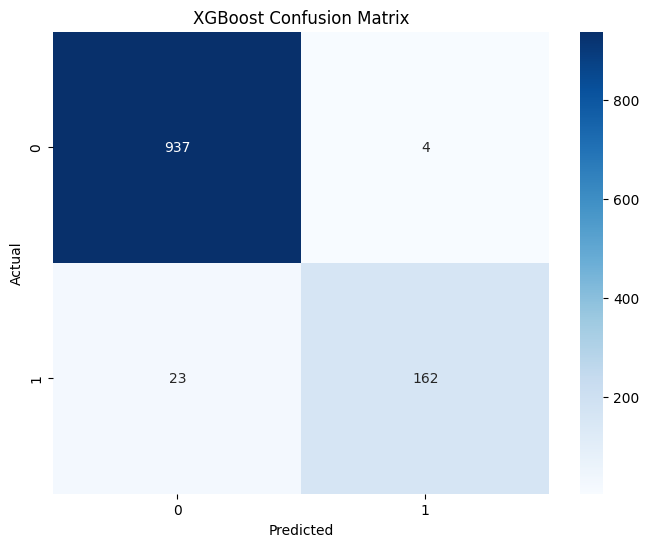

In [242]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:{:.2f}%".format(xgb_accuracy*100))
print("\n")
print("Classification Report")
print(classification_report(y_test, xgb_predictions))
print("\n")
#Plot the confusion matrix for XGBoost model
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Summary

**Linear Regression**

Mean Squared Error (MSE) = 0.10
- An MSE of 0.10 suggests the model's predictions are relatively close to the actual values, but whether it's "good" depends on the context and scale of the data.

R-squared (R²) = 0.30
- A value of 0.30 (or 30%) indicates that the model explains only 30% of the variance in the target variable.

- This is relatively low, suggesting that the model is not capturing key factors influencing the target variable.

**Random Forest**

Model Accuracy :96.54%

confusion matrix for a Random Forest model represents:

- True Negatives (TN): 940 (Correctly classified class 0)
- False Positives (FP): 1 (Misclassified class 0 as class 1)
- False Negatives (FN): 38 (Misclassified class 1 as class 0)
- True Positives (TP): 147 (Correctly classified class 1)


**XGBoost**

Model Accuracy :97.60%

confusion matrix for a Random Forest model represents:

- True Negatives (TN): 937 (Correctly predicted class 0)
- False Positives (FP): 4 (Misclassified class 0 as class 1)
- False Negatives (FN): 23 (Misclassified class 1 as class 0)
- True Positives (TP): 162 (Correctly predicted class 1)

Out of the 3 models , **XGBoost** is the best model with the highest accuracy (97.60%) and a better balance between precision and recall, reducing false negatives compared to Random Forest. Linear Regression performs poorly (R² = 0.30), making it unsuitable for this classification task.


Predicting using XGBoost Model

In [243]:
 # Creating a dataset with customers corresponding to the predictions
new_df = pd.concat((df['CustomerID'], pd.Series(xgb_predictions)), axis = 1)
new_df.columns = ["CustomerID", "Churn"]
new_df.head()

,CustomerID,Churn
0,50001,1.0
1,50002,0.0
2,50003,0.0
3,50004,0.0
4,50005,0.0


In [244]:
new_df[new_df['Churn'] == 1]

,CustomerID,Churn
0,50001,1.0
15,50016,1.0
16,50017,1.0
32,50033,1.0
34,50035,1.0
...,...,...
1064,51065,1.0
1067,51068,1.0
1076,51077,1.0
1083,51084,1.0


- Based on the model 166 customers from the whole dataset with the given corresponding ID's are likely to Churn in the future.

## Problems Identified:

**High Customer Churn in the First 0-5 Years:**

A significant churn rate early in customer tenure could be due to poor onboarding or early dissatisfaction with the service.
Single Customers and Churn:

Single customers are more likely to churn, suggesting that this demographic might not be as loyal as others.


**Mobile Category Churn:**

Customers in the mobile category have a higher likelihood of churning, indicating issues specific to the product category, such as pricing or service experience.

**Delivery Delays in Tier 3 Cities:**

Longer delivery times in Tier 3 cities could negatively affect customer satisfaction and retention, especially in comparison to faster deliveries in Tier 1 and Tier 2 cities.

## Marketing Strategy Suggestions:

**Enhance Early Customer Experience:**

Offer tailored onboarding experiences and introduce loyalty incentives like personalized discounts or rewards during the first few years of tenure. Targeting this period with positive interactions could reduce churn.
Targeted Campaigns for Single Customers:

Develop marketing campaigns that appeal specifically to single customers, such as exclusive offers, events, or services that meet their lifestyle needs. Highlight loyalty programs and benefits to keep them engaged.

**Improve Mobile Product Offering:**

Review product pricing, quality, and customer service for the mobile category. Offer better value propositions, such as bundle offers, extended warranties, or priority customer support for mobile users to reduce churn.

**Improve Logistics in Tier 3 Cities:**

Work on improving delivery times by partnering with local logistics firms, optimizing warehouse locations, or implementing faster shipping methods. Communicate transparently with customers about delivery times and offer compensation or incentives for delays.

By addressing these issues directly, the company can improve customer retention and satisfaction across different demographics and regions.

